In [2]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
plt.viridis()

In [79]:
# Membrane
v_rest = -70 #mV
e_ext = 0 #V
v_thr = -54 #mV
g_max = 0.2
tau_m = 20. #ms
tau_ex = 5. #ms

# Inputs
f_mean = 20 #Hz
f_base = 5 #Hz
f_peak = 152.8 #Hz
sigma_stim = 2
t_stim = 0.02 #s

rate = f_base + f_peak

169


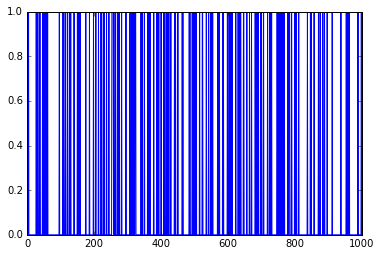

In [54]:
T = 100
dt = 0.1
times = np.arange(0, T+dt, dt)
previous_spike_time = None
Vem = np.ones(len(times)) * v_rest
input_spikes = np.random.poisson(rate/1000., len(times))
input_spikes = np.clip(input_spikes, 0,1)
g = np.ones(len(times)) * g_max
print (np.count_nonzero(input_spikes))
plt.plot(input_spikes)

In [55]:
for i, t in enumerate(times):
    if input_spikes[i]:
        previous_spike_time = t
    
    if previous_spike_time:
        g[i] = g[i-1] + g[i-1] * (np.e **(-(t-previous_spike_time)/tau_ex) )
        
    

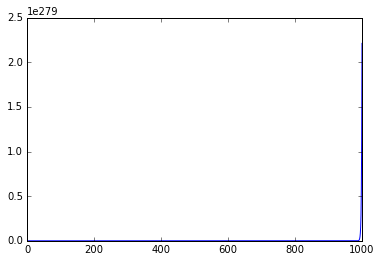

In [56]:
plt.plot(g)

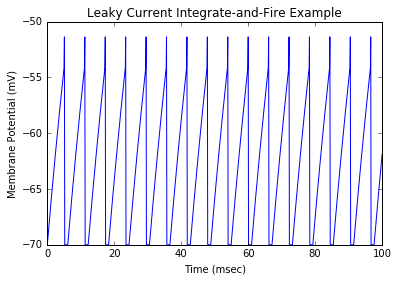

In [84]:
## setup parameters and state variables
T       = 100                  # total time to simulate (msec)
dt      = 0.1               # simulation time step (msec)
time    = np.arange(0, T+dt, dt) # time array
t_rest  = 0                   # initial refractory time

## LIF properties
Vm      = np.ones(len(time)) * v_rest    # potential (V) trace over time
Rm      = 1                   # resistance (kOhm)
Cm      = 10                  # capacitance (uF)
# tau_m   = Rm*Cm               # time constant (msec)
tau_ref = 1                   # refractory period (msec)
Vth     = 1                   # spike threshold (V)
V_spike = 2.5                 # spike delta (V)

## Stimulus
I       = 1.5                 # input current (A)

## iterate over each time step
for i, t in enumerate(time): 
    if t > t_rest:
        Vm[i] = Vm[i-1] + (-Vm[i-1] + I*Rm) / tau_m * dt
        if Vm[i] >= v_thr:
            Vm[i] += V_spike
#             Vm[i] = v_rest
            t_rest = t + tau_ref

## plot membrane potential trace
plt.plot(time, Vm)
plt.title('Leaky Current Integrate-and-Fire Example')
plt.ylabel('Membrane Potential (mV)')
plt.xlabel('Time (msec)')
# plt.ylim([0,2])

In [81]:
tau_ref

4